In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
df = pd.read_csv('table_HAT-P-18-b-Fu-et-al.-2022.csv')

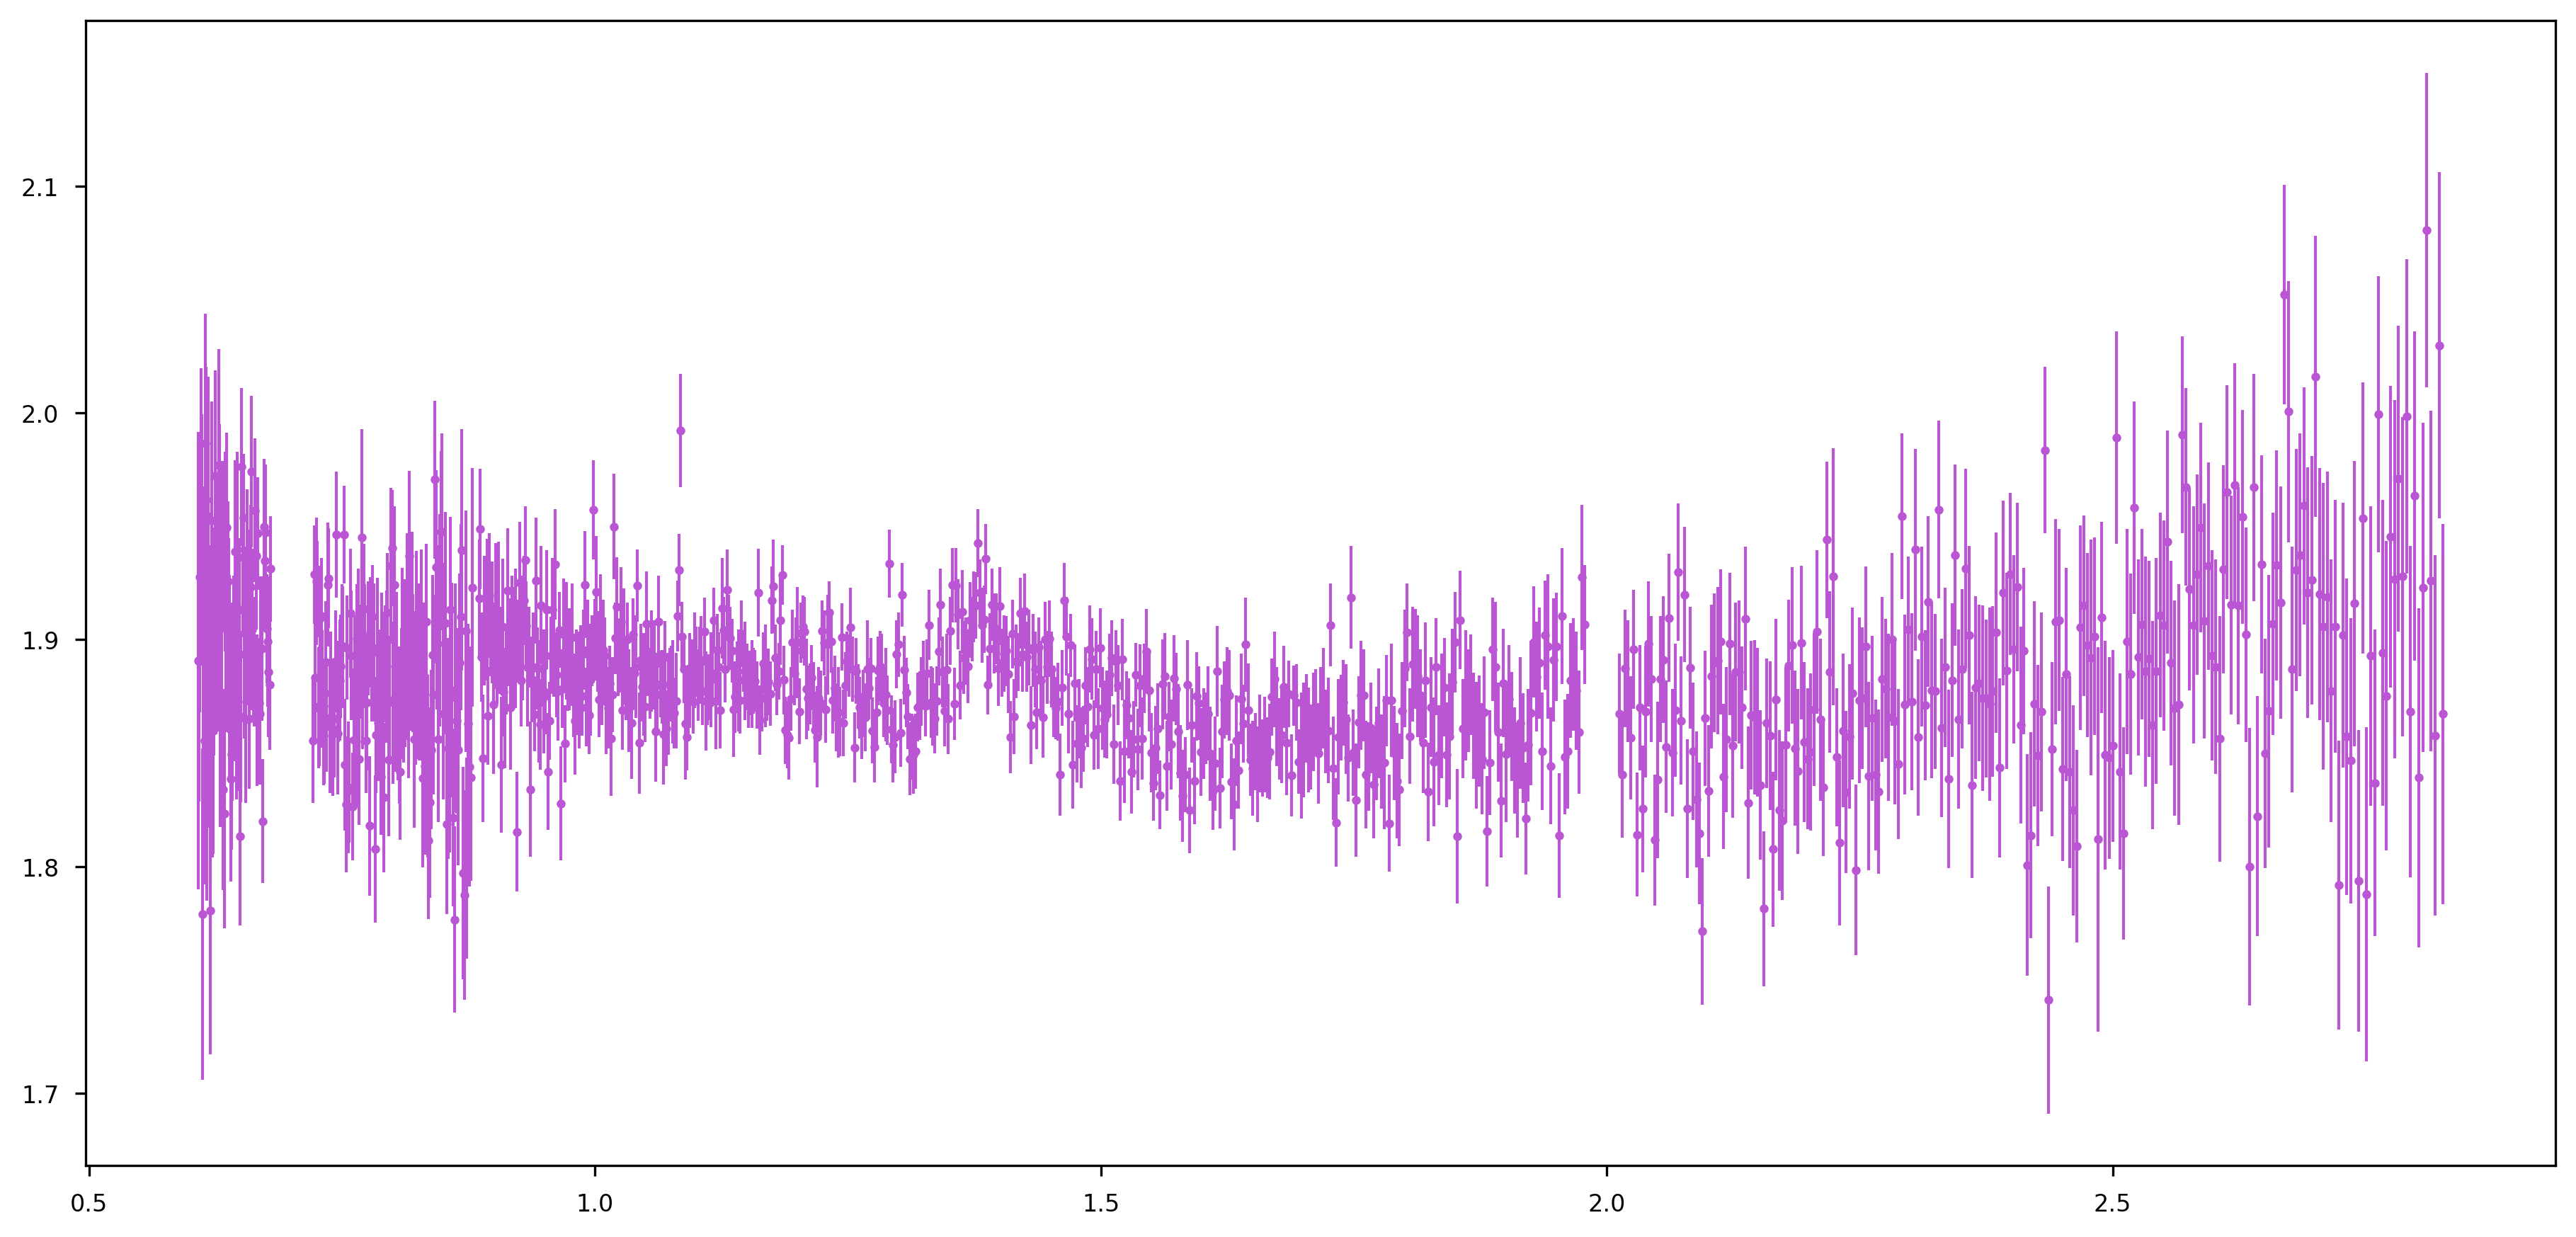

In [61]:
plt.figure(figsize=(15,7))
plt.errorbar(df['CENTRALWAVELNG'], df['PL_TRANDEP'], yerr = df['PL_TRANDEPERR1'], color = 'mediumorchid', fmt='o')
plt.show()

In [4]:
import os
os.environ['picaso_refdata'] = 'reference'
os.environ['PYSYN_CDBS'] = 'grp/redcat/trds/'

import picaso.justdoit as jdi
import picaso.justplotit as jpi
import picaso.analyze as lyz


In [62]:
model_dir = 'Models'
grid_name = "picaso_cld_free"
location = os.path.join(model_dir,"RCTE_cloud_free")
fitter = lyz.GridFitter(grid_name,location, verbose=True)

Total number of models in grid is 192
For tint in planet_params grid is: [100. 200. 300.]
For heat_redis in planet_params grid is: [0.4 0.5]
For mh in planet_params grid is: [  0.1     0.316   1.      3.162  10.     31.623  50.119 100.   ]
For cto in planet_params grid is: [0.229 0.458 0.687 0.916]


In [63]:
wlgrid_center, wlgrid_width, rprs_data2, e_rprs2 = np.array(df['CENTRALWAVELNG']), np.array(df['BANDWIDTH']), np.array(df['PL_TRANDEP'])/100, np.array(df['PL_TRANDEPERR1'])/100


#wlgrid_center,rprs_data2,wlgrid_width, e_rprs2 = np.loadtxt('FIREFLY_REDUCTION.txt',usecols=[0,1,2,3],unpack=True,skiprows=1)
fitter.add_data('firefly',wlgrid_center, wlgrid_width, rprs_data2, e_rprs2)

In [64]:
fitter.fit_grid('picaso_cld_free','firefly')

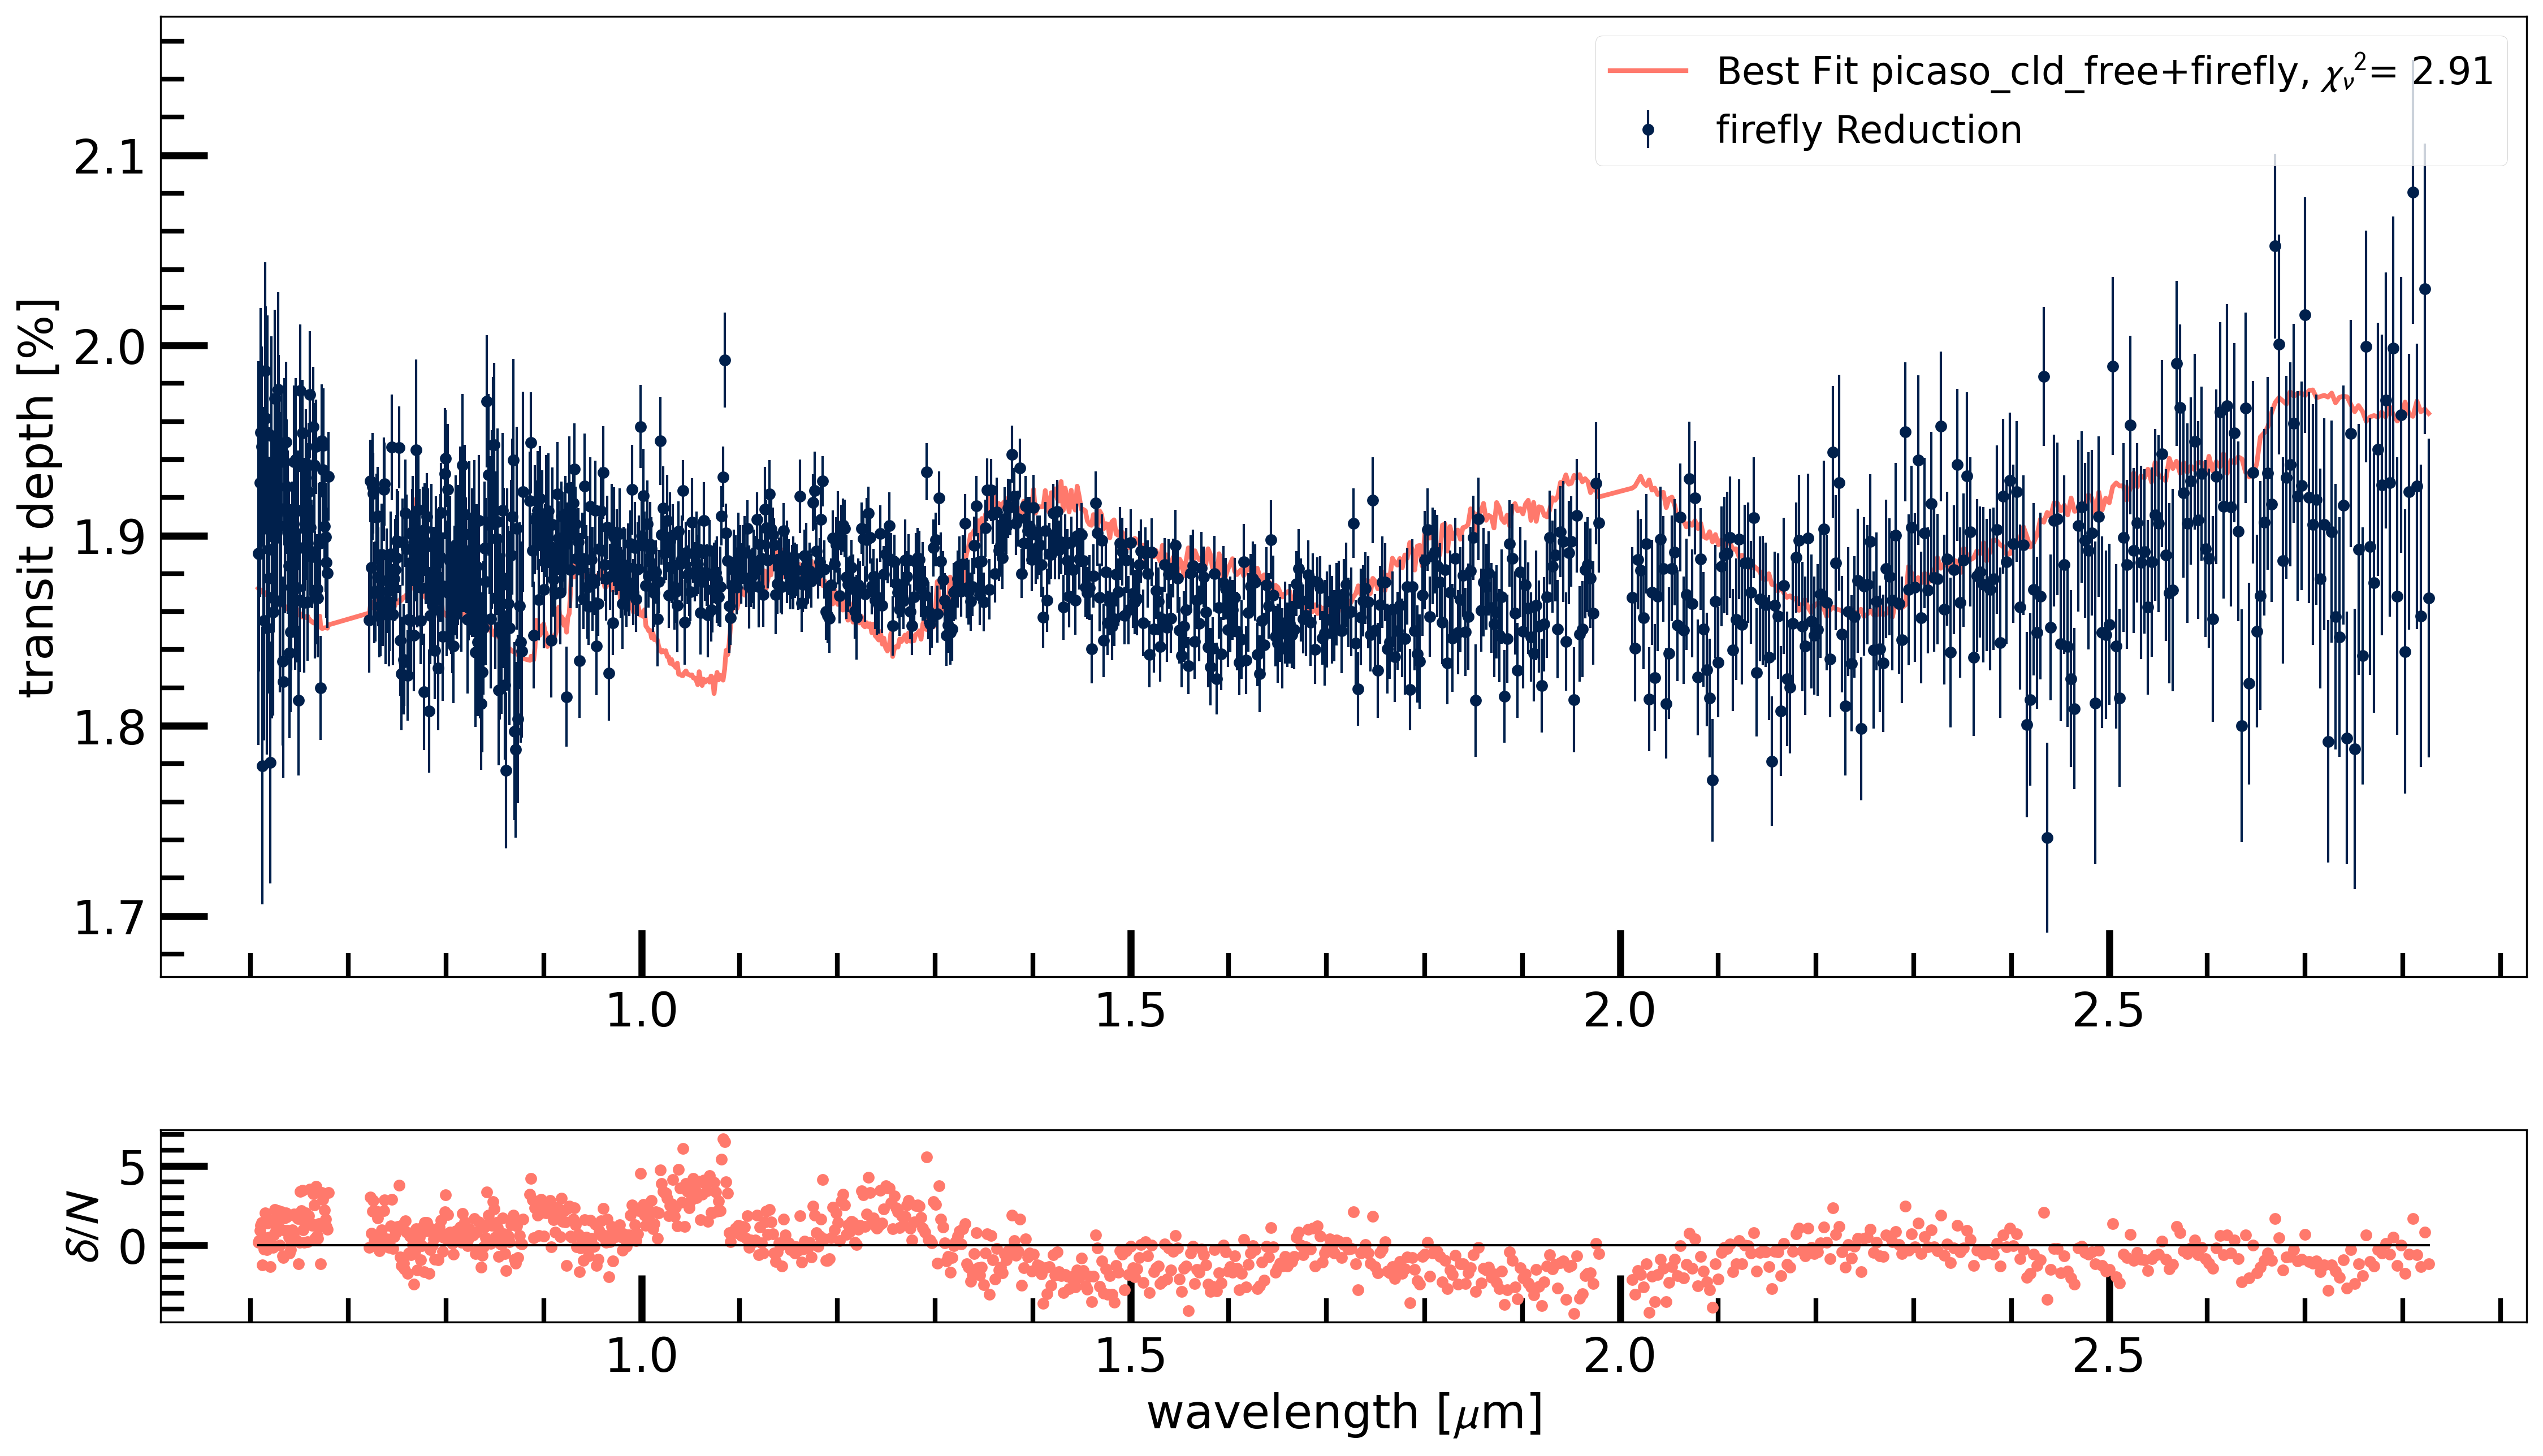

In [65]:
fig,ax = fitter.plot_best_fit(['picaso_cld_free'],'firefly')

In [66]:
out = fitter.as_dict()
print("cld free", np.array(out['chi_sqs']['picaso_cld_free']['firefly']
        )[out['rank_order']['picaso_cld_free']['firefly']][0:5])

cld free [2.91049941 2.92344297 2.95745603 3.18304874 3.19973236]


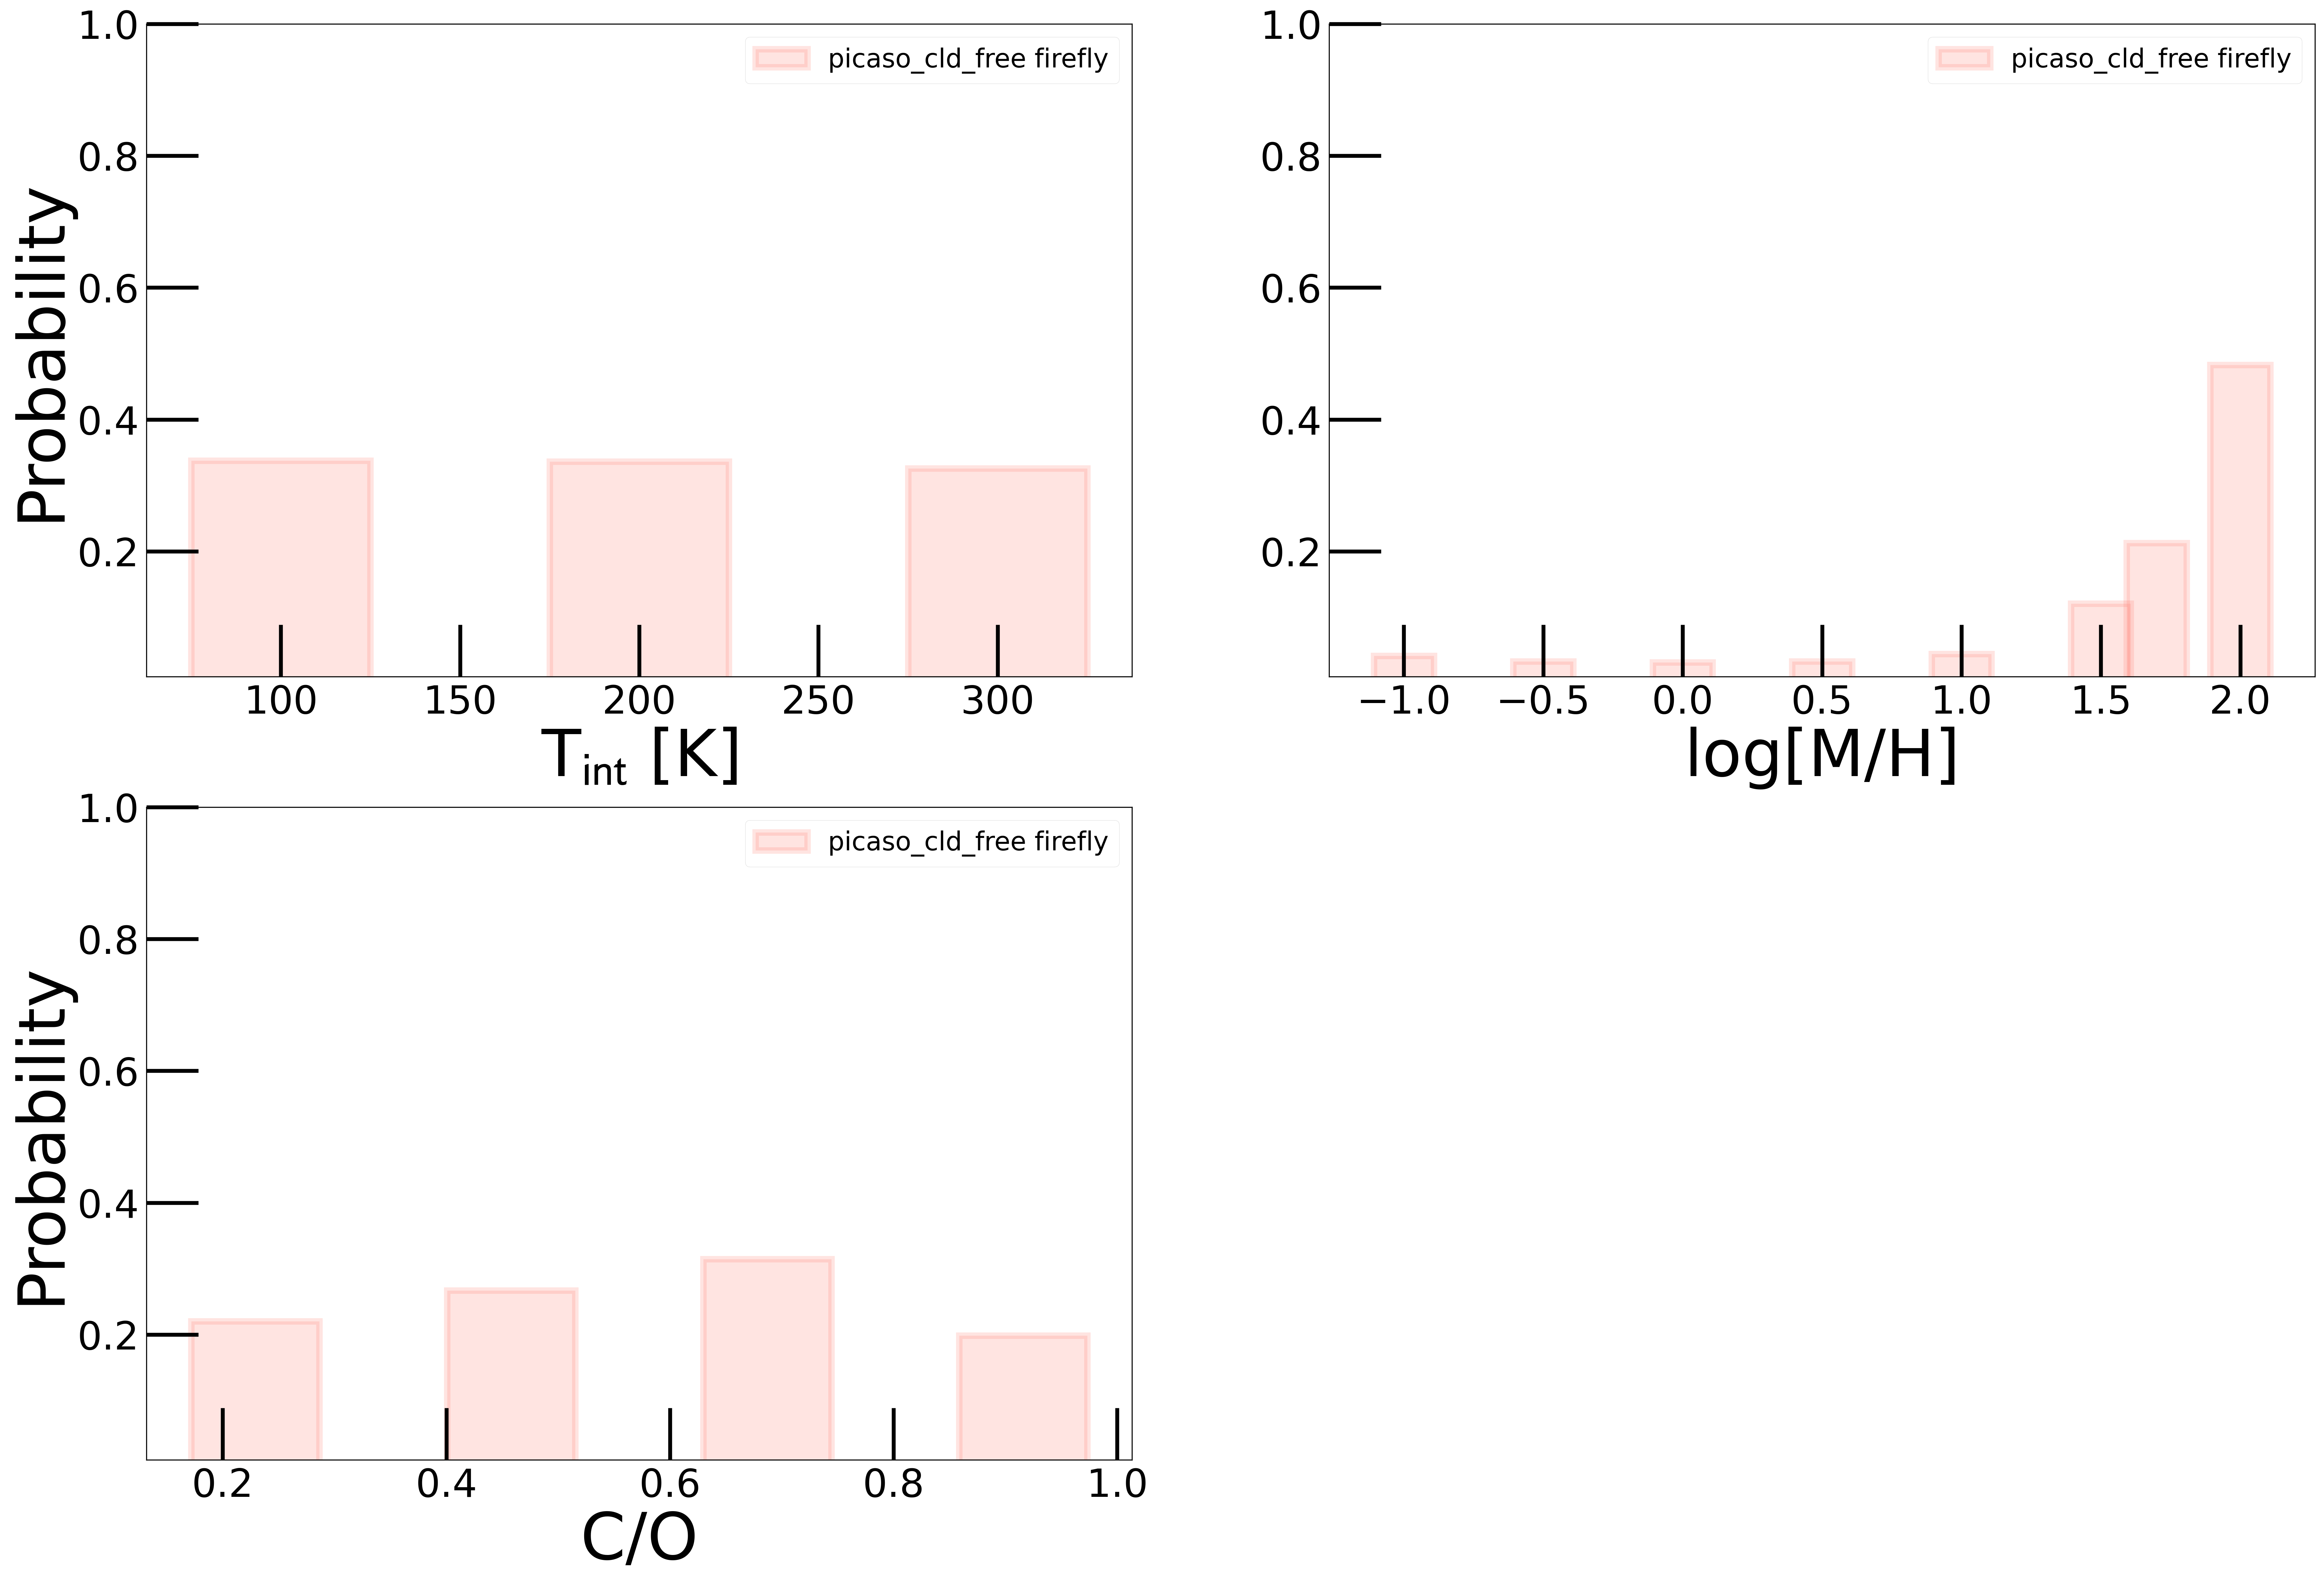

In [67]:
f,a=fitter.plot_posteriors('picaso_cld_free','firefly',['tint','mh','cto'],
               x_label_style={'tint':r"T$_{\rm int}$ [K]",
                              'mh':"log[M/H]", 'cto':r"C/O"},
               x_axis_type={'tint':r"linear",
                              'mh':"log", 'cto':r"linear"})

In [69]:
top_model_file  = np.array(out['list_of_files']['picaso_cld_free']
        )[out['rank_order']['picaso_cld_free']['firefly']][0]

xr_usr = jdi.xr.load_dataset(top_model_file)
#take a look at the Xarray file
xr_usr

<xarray.Dataset>
Dimensions:        (pressure: 91, wavelength: 8988)
Coordinates:
  * pressure       (pressure) float64 1e-06 1.267e-06 ... 1.42e+03 1.8e+03
  * wavelength     (wavelength) float64 6.0 5.998 5.996 ... 0.3003 0.3002 0.3001
Data variables: (12/39)
    temperature    (pressure) float64 758.0 735.5 727.6 ... 3.453e+03 3.62e+03
    e-             (pressure) float64 6.658e-15 9.49e-16 ... 1.376e-06 1.947e-06
    H2             (pressure) float64 0.7679 0.7684 0.7685 ... 0.7771 0.8037
    H              (pressure) float64 4.04e-10 1.229e-10 ... 0.01242 0.01626
    H+             (pressure) float64 4.551e-38 4.551e-38 ... 1.424e-16
    H-             (pressure) float64 1.315e-26 1.111e-27 ... 3.268e-07 6.06e-07
    ...             ...
    OCS            (pressure) float64 1.054e-05 1.067e-05 ... 1.326e-05
    Li             (pressure) float64 3.688e-12 8.709e-13 ... 1.12e-07 1.242e-07
    LiOH           (pressure) float64 3.967e-09 2.048e-09 ... 2.572e-07
    LiH            (pressure) float64 1.211e-15 3.575e-16 ... 1.242e-07
    LiCl           (pressure) float64 6.353e-08 7.773e-08 ... 3.311e-09
    transit_depth  (wavelength) float64 0.02244 0.02261 ... 0.02216 0.02215
Attributes:
    author:          Sagnick Mukherjee
    contact:         samukher@ucsc.edu
    code:            {"spectrum": "PICASO", "climate": "PICASO", "chemistry":...
    doi:             Mukherjee et al. (Submitted)
    planet_params:   {"rp": {"value": 1.279, "unit": "jupiterRad"}, "mp": {"v...
    stellar_params:  {"rs": {"value": 0.932, "unit": "solRad"}, "logg": 4.389...
    orbit_params:    {"sma": 0.0486}
    cld_params:      {"opd": "None", "ssa": "None", "asy": "None", "p_cloud":...

2146it [00:04, 433.96it/s, +500 | bound: 2 | nc: 1 | ncall: 18899 | eff(%): 14.381 | loglstar:   -inf < -1536.882 <    inf | logz: -1540.274 +/-  0.062 | dlogz:  0.001 >  0.509]
2737it [00:05, 483.76it/s, +500 | bound: 3 | nc: 1 | ncall: 19340 | eff(%): 17.182 | loglstar:   -inf < -1536.882 <    inf | logz: -1541.446 +/-  0.077 | dlogz:  0.001 >  0.509]


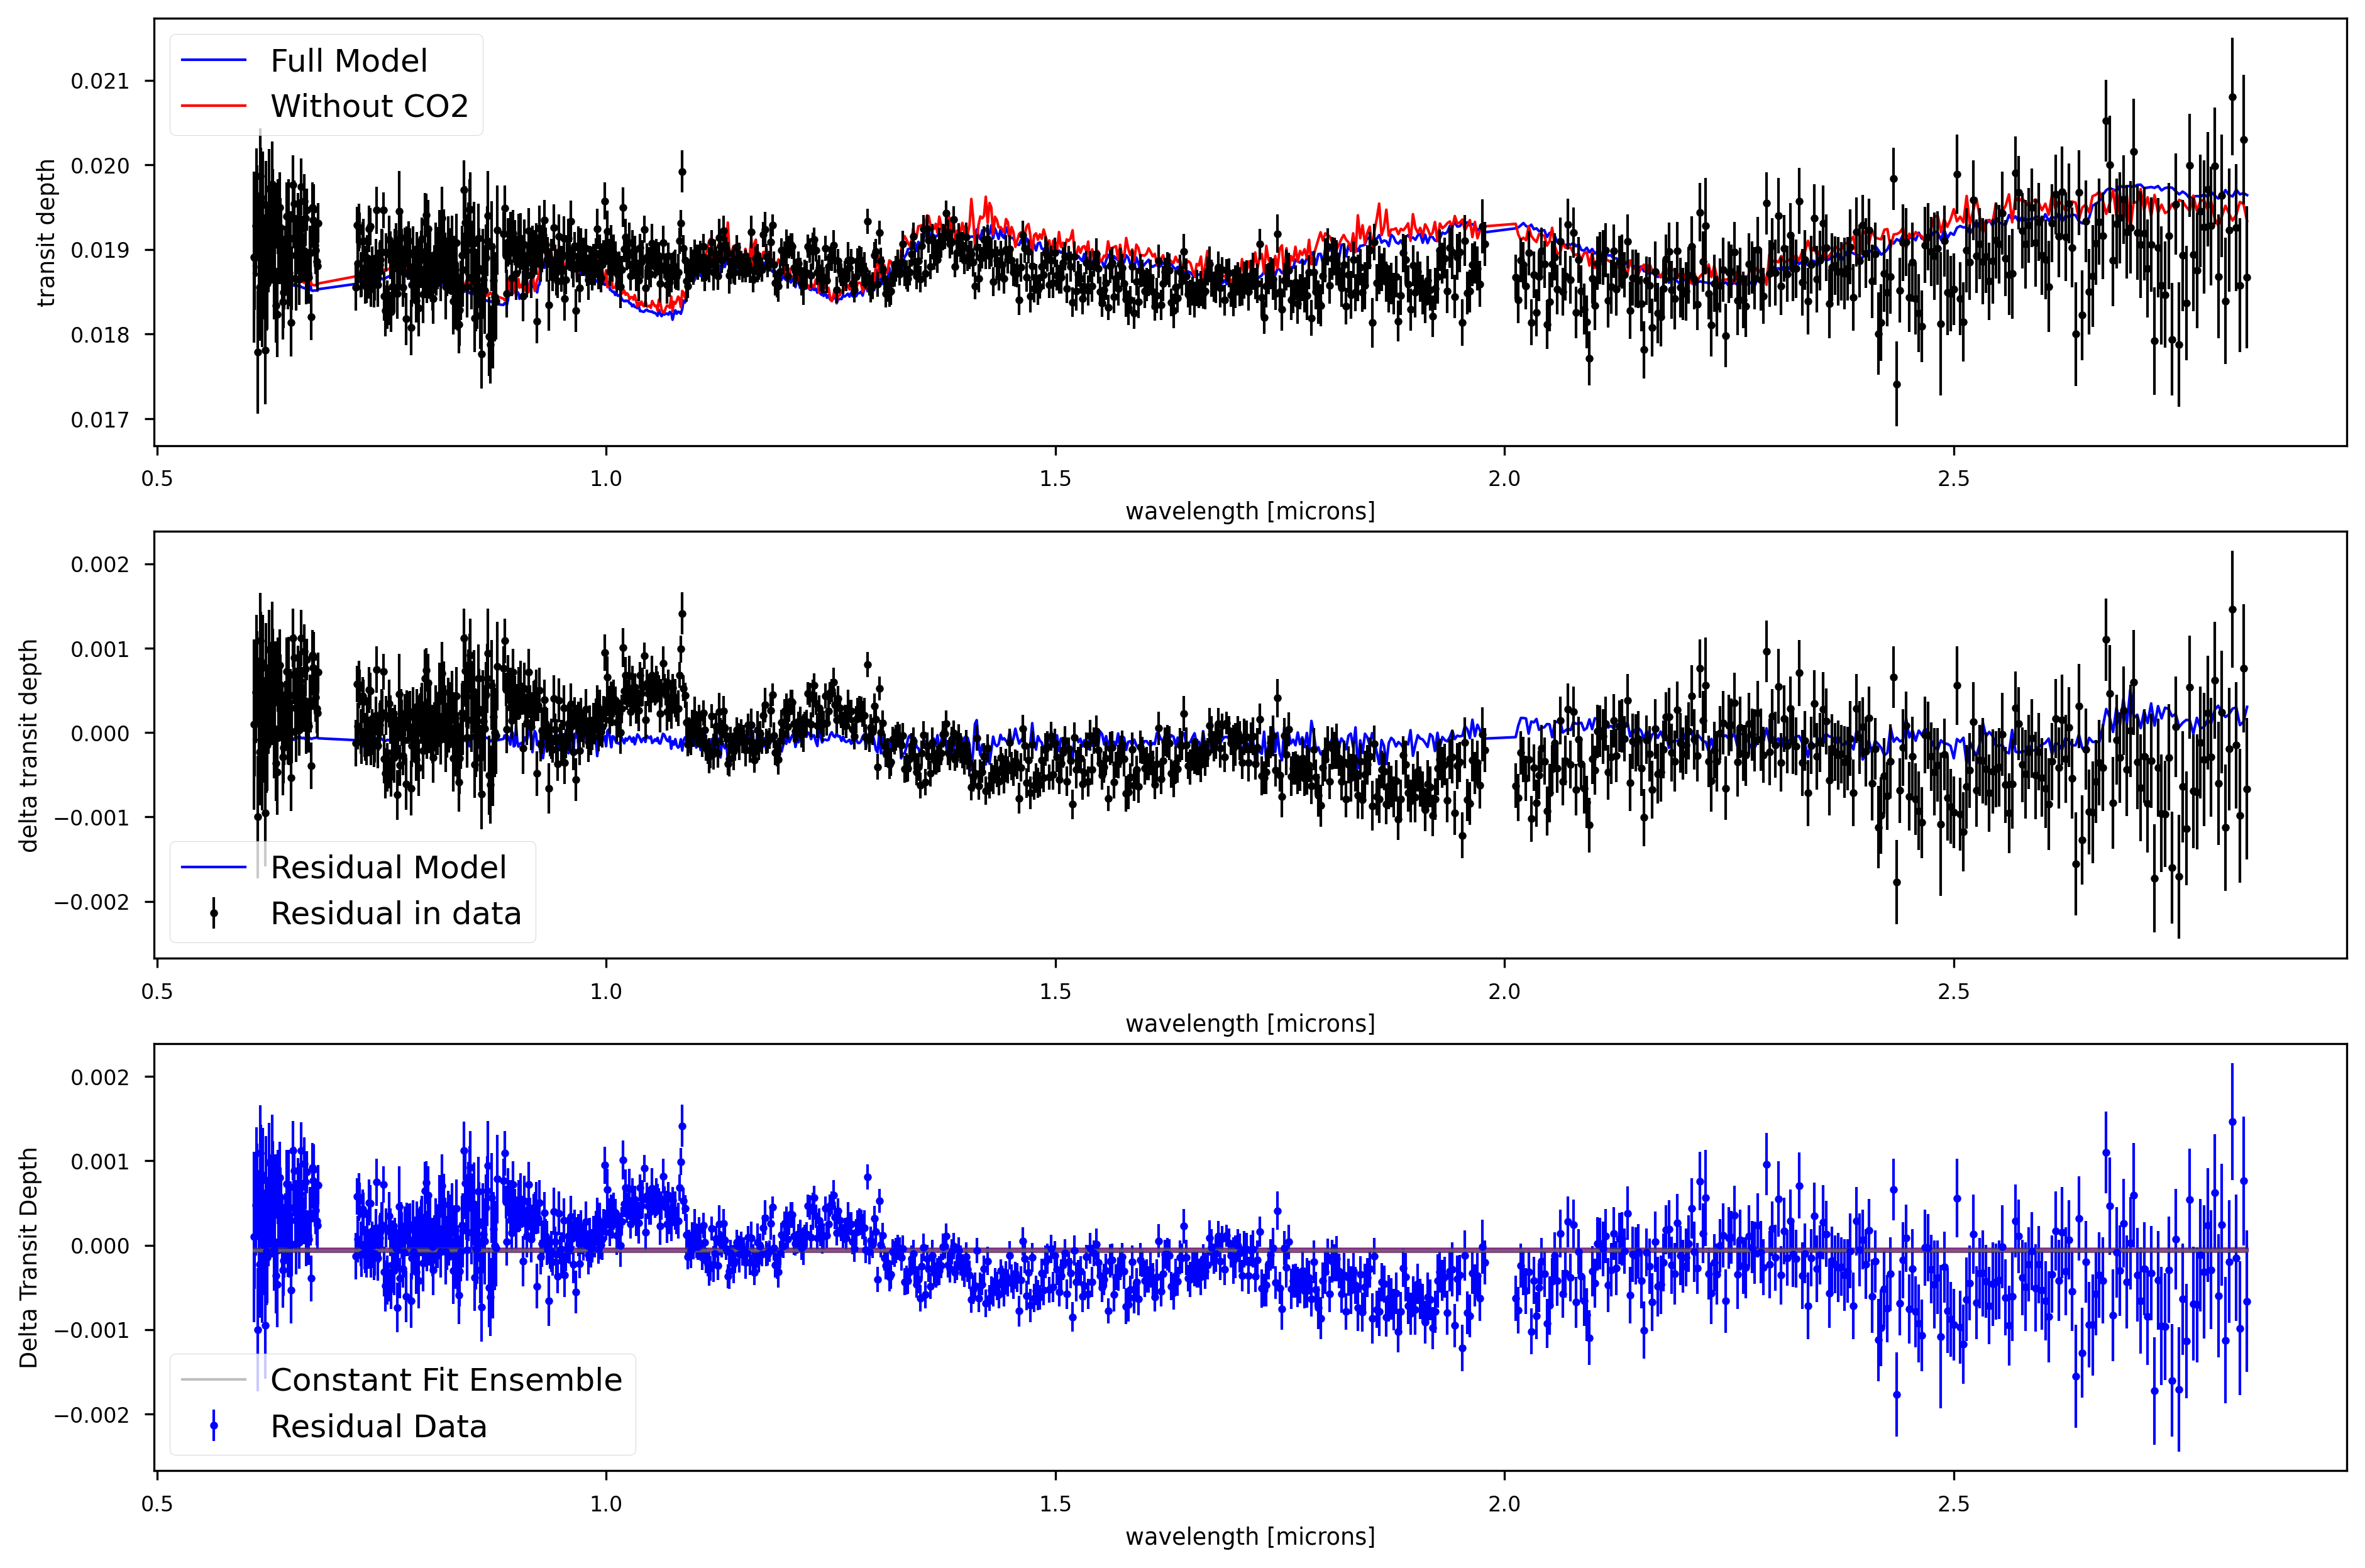

In [82]:
top_model_file  = np.array(out['list_of_files']['picaso_cld_free']
        )[out['rank_order']['picaso_cld_free']['firefly']][0]

min_wave = 3 #min wave to search for gauss peak
max_wave = 5 #max wave to search for gauss peak
out = lyz.detection_test(fitter,'CO2',min_wave,max_wave,'picaso_cld_free','firefly',
                     top_model_file,
                     #opa_kwargs={wave_range=[]}#this is where you input arguments for opannection
                     plot=True)

In [78]:
opa = jdi.opannection(wave_range=[3,5])
case = jdi.input_xarray(xr_usr, opa)

#copy atmo before modifying and rerunning picaso


Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///tmp/tmpls50_qf7.html"
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


In [81]:
og_atmo = jdi.copy.deepcopy(case.inputs['atmosphere']['profile'])
#atmo
w,f,l =[],[],[]
for iex in ['CH4','H2O','CO2',None]:
    case.atmosphere(df = og_atmo,exclude_mol=iex, delim_whitespace=True)
    df= case.spectrum(opa, full_output=True,calculation='transmission') #note the new last key
    wno, rprs2  = df['wavenumber'] , df['transit_depth']
    wno, rprs2 = jdi.mean_regrid(wno, rprs2, R=150)
    w +=[wno]
    f+=[rprs2]
    if iex==None:
        leg='all'
    else:
        leg = f'No {iex}'
    l+=[leg]
#jpi.show(jpi.spectrum(w,f,legend=l))

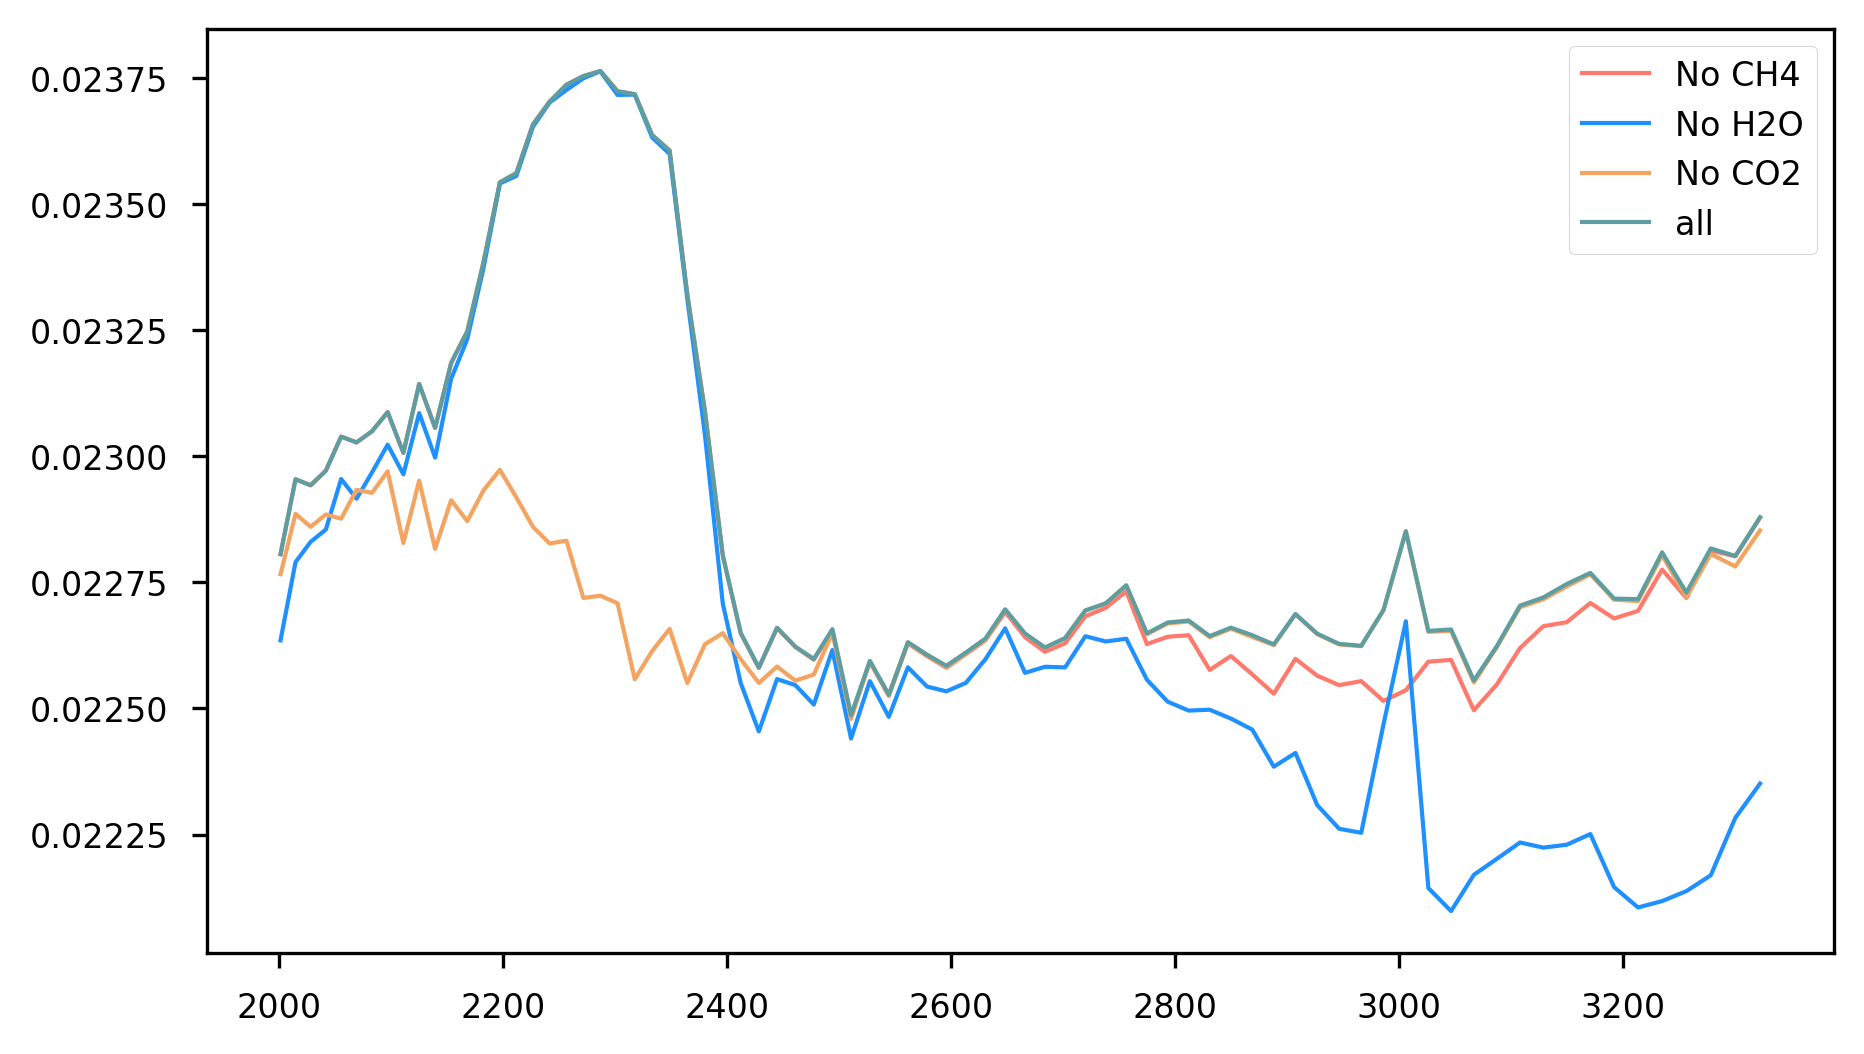

In [86]:
for i in range(len(w)):
    plt.plot(w[i],f[i],label=l[i])
    
plt.legend()
plt.show()